<a href="https://colab.research.google.com/github/akhileshgrandhi/MAT-421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 14 - Linear Algebra and the System of Linear Equations

In [1]:
# printing the shape of row and column 
import numpy as np
vector_row = np.array([[2, 4, 6, 8, 10]])
vector_column = np.array([[-1], 
                          [-2], 
                          [-3], 
                          [-4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


In [2]:
# Transpose the row vector we defined above into a column vector and calculate 
# and calculate the 𝐿1, 𝐿2, and 𝐿∞ norm of it
from numpy.linalg import norm
new_vector = vector_row.T
print(new_vector)
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)

[[ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]]
L_1 is: 30.0
L_2 is: 14.8
L_inf is: 10.0


In [3]:
# using dot product to find the angle between the vectors

from numpy import arccos, dot
v = np.array([[1, 2, 3]])
w = np.array([[4, 7, 10]])
theta = \
    arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)


[[0.05098681]]


In [5]:
# cross product of two vectors
v = np.array([[0, 0, 1]])
w = np.array([[3, 0, 4]])
print(np.cross(v, w))

[[0 3 0]]


In [7]:
# using mathematical operations on vectors
v = np.array([[0, 1, 4]])
w = np.array([[2, 1, 6]])
u = np.array([[0, 5, 0]])
x = 3*v-w+4*u
print(x)

[[-2 22  6]]


In [10]:
# printing matrices and their dot products
P = np.array([[1, 2], [5, 3], [5, 0]])
Q = np.array([[2, 6, 7, 1], [1, 7, 3, 2]])
print(P)
print(Q)
print(np.dot(P, Q))


[[1 2]
 [5 3]
 [5 0]]
[[2 6 7 1]
 [1 7 3 2]]
[[ 4 20 13  5]
 [13 51 44 11]
 [10 30 35  5]]


In [11]:
# identity matrices 
from numpy.linalg import det

M = np.array([[0,4,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,1,1]])
print('M:\n', M)

print('Determinant: %.1f'%det(M))
I = np.eye(4)
print('I:\n', I)
print('M*I:\n', np.dot(M, I))

M:
 [[0 4 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 1 1]]
Determinant: -28.0
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
M*I:
 [[0. 4. 1. 3.]
 [3. 2. 8. 1.]
 [1. 0. 0. 3.]
 [0. 3. 1. 1.]]


In [12]:
# finding inverse
from numpy.linalg import inv

print('Inv M:\n', inv(M))
P = np.array([[0,1,0],
              [0,0,0],
              [1,0,1]])
print('det(p):\n', det(P))

Inv M:
 [[-2.35714286 -0.10714286  1.32142857  3.21428571]
 [-0.57142857 -0.07142857  0.21428571  1.14285714]
 [ 0.92857143  0.17857143 -0.53571429 -1.35714286]
 [ 0.78571429  0.03571429 -0.10714286 -1.07142857]]
det(p):
 0.0


In [15]:
# finding the condition number and rank of the matrix
from numpy.linalg import \
             cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,1]])

print('Condition number:\n', cond(A))
print('Rank:\n', matrix_rank(A))
y = np.array([[1], [4], [3]])
A_y = np.concatenate((A, y), axis = 1)
print('Augmented matrix:\n', A_y)

Condition number:
 4.048917339522305
Rank:
 3
Augmented matrix:
 [[1 1 0 1]
 [0 1 0 4]
 [1 0 1 3]]


In [16]:
# LU Factorization

import numpy as np

u = np.array([[4, 3, -5], 
              [0, -2.5, 2.5], 
              [0, 0, 12]])
l = np.array([[1, 0, 0], 
              [-0.5, 1, 0], 
              [2, -0.8, 1]])

print('LU=', np.dot(l, u))

LU= [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]


In [17]:
# Gauss Siedel Method

x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-3*x2+3*x3)/8
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-8-3*x1-5*x2)/(-5)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')


Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, 1.5875
2, 2.7437, -0.3188, 2.9275
3, 2.9673, 0.4629, 3.8433
4, 3.0177, 1.0226, 4.4332
5, 3.0290, 1.3885, 4.8059
6, 3.0315, 1.6208, 5.0397
7, 3.0321, 1.7668, 5.1861
8, 3.0322, 1.8582, 5.2776
9, 3.0322, 1.9154, 5.3348
10, 3.0323, 1.9512, 5.3705
11, 3.0323, 1.9735, 5.3929
12, 3.0323, 1.9875, 5.4068
13, 3.0323, 1.9962, 5.4156
14, 3.0323, 2.0017, 5.4210
Converged!


Chapter 15 - Eigen Values and Eigen Vectors

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

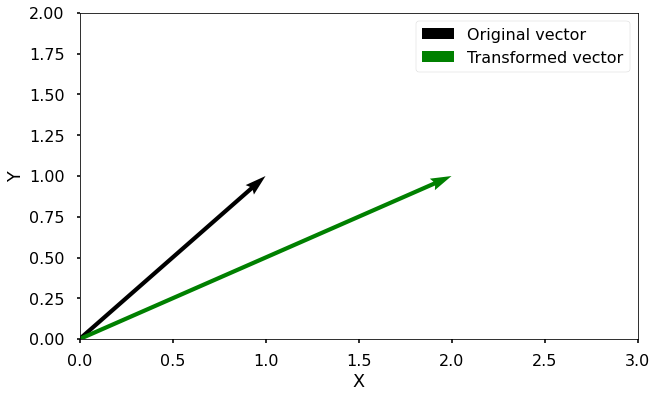

In [20]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

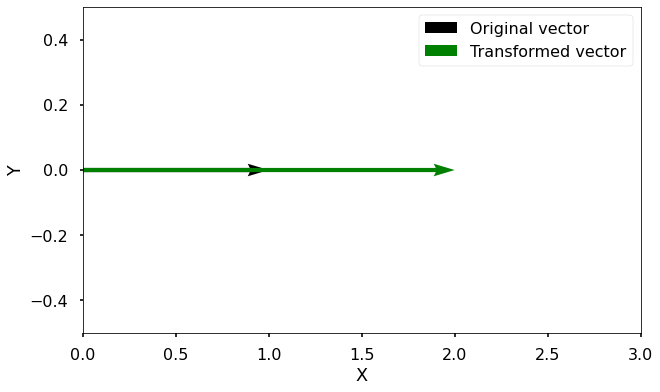

In [21]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))

In [22]:
# Power Method in Python
import numpy as np
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

In [23]:
x = np.array([1, 1])
a = np.array([[0, 2], 
              [2, 3]])

for i in range(8):
    x = np.dot(a, x)
    lambda_1, x = normalize(x)
    
print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)

Eigenvalue: 3.999949137887188
Eigenvector: [0.50000636 1.        ]


In [24]:
# Inverse Power Method in Python
from numpy.linalg import inv
a_inv = inv(a)

for i in range(8):
    x = np.dot(a_inv, x)
    lambda_1, x = normalize(x)
    
print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)

Eigenvalue: 0.20000000000003912
Eigenvector: [1. 1.]


In [25]:
# QR Method in Python

import numpy as np
from numpy.linalg import qr
a = np.array([[0, 2], 
              [2, 3]])

q, r = qr(a)

print('Q:', q)
print('R:', r)

b = np.dot(q, r)
print('QR:', b)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


In [27]:
# Eigen Values in Python
import numpy as np
from numpy.linalg import eig
a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [ 8.80916362  0.92620912 -0.73537273]
E-vector [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


Chapter 16 - Least Squares Regression

In [28]:
# Direct Inverse Method
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.42855964]
 [1.02136638]]


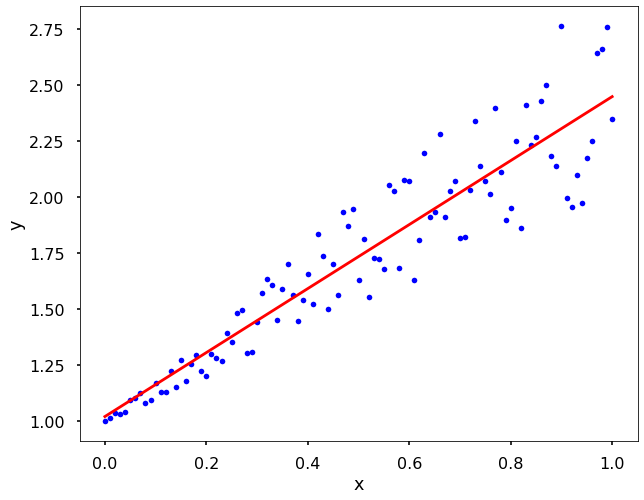

In [29]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
# using psuedo inverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.42855964]
 [1.02136638]]


In [31]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)


[[1.42855964]
 [1.02136638]]


In [32]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.37683152 1.039449  ]


In [35]:
# use optimize.curve for scipy
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')



alpha=1.1444369320296108, beta=0.775051864359638


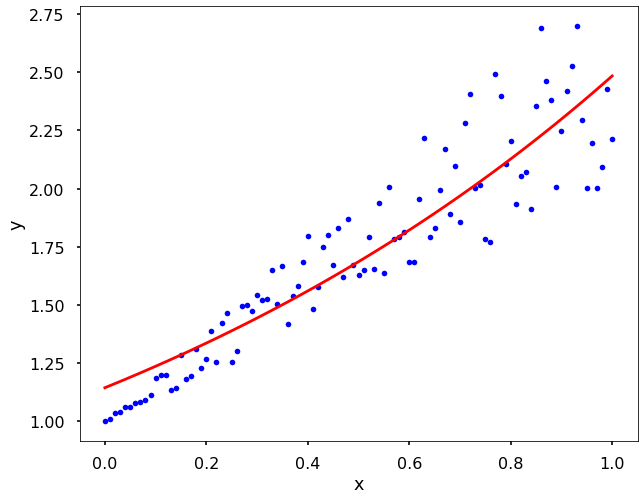

In [36]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

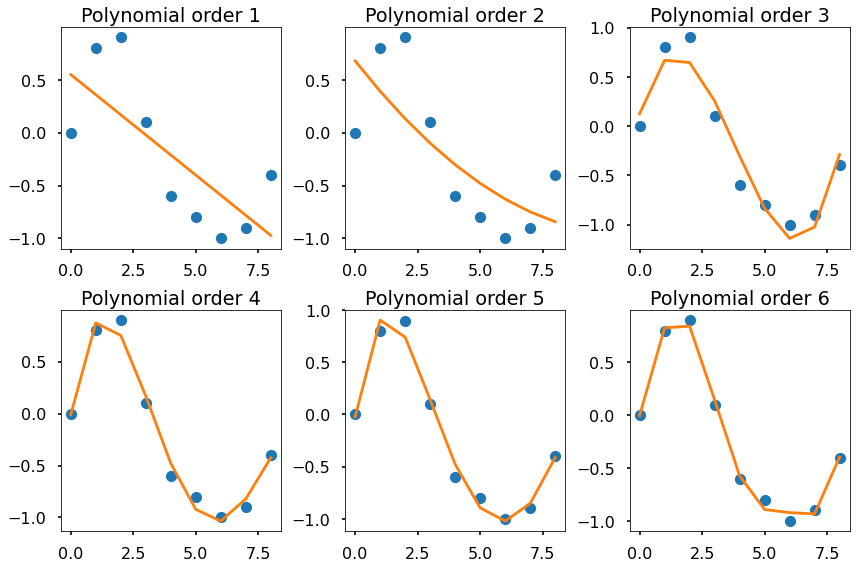

In [37]:
# polynomial regression

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()